<a href="https://colab.research.google.com/github/anu-shree-anil/Machine-learning-Algorithms/blob/main/Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math
from statistics import mean
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report


In [ ]:
#loading the data
iris=datasets.load_iris()
print(iris.DESCR)
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
X=pd.DataFrame(iris.data)
Y=pd.DataFrame(iris.target)
print("ORIGINAL DATA:")
print(df)

#normalize the dataset
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min()) 

#One-vs-All
df=X.copy()
df['target']=Y

#DATA PREPROCESSING- ONE HOT ENCODING
df.insert(4,"y1",0, True)
df.insert(5,"y2",0, True)
df.insert(6,"y3",0, True)
df.drop('target', inplace=True, axis=1)

Y_arr=Y.to_numpy()
D=df.to_numpy()
j=0;
for i in range(len(df)):
  if Y_arr[i]==0:
     D[i][4]=1
  elif (Y_arr[i]==1):
    D[i][5]=1
  else:
    D[i][6]=1

df=pd.DataFrame(D)
df = df.sample(frac = 1)
print("After one hot encoding: \n",df)      

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
def sigmoid_neuron(dataset,learning_rate,epochs):
  rows = len(dataset.axes[0])
  
  X = dataset.iloc[:, :-3]
  Y = dataset.iloc[:, -3:]

  X.insert(0, "DEFAULT",1, True)
  cols = len(X.axes[1]) 
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()

  X_arr, Y_arr = shuffle(X_arr, Y_arr)
  l=learning_rate
 # X_arr=np.append(X_arr,0, axis=0)
  W=[]
  for i in range(3):
    w=[]
    for j in range(cols):
       w.append(0.1)
    W.append(w)   
 
  W= np.array(W)  
  visited_index=[]
  index = random.randint(0, len(X_arr)-1)
  epoch=1
  converged=True
  err_in=0
  err=0
  while converged:
    X_arr, Y_arr = shuffle(X_arr, Y_arr)
    d=1/(1+np.exp(-np.dot(W,np.transpose(X_arr[index]))))
    err_in= err_in+(1/2)*sum((d-Y_arr[index])**2)
    
    for i in range(3):
        for j in range(cols):
          W[i][j]=W[i][j]+(l*(Y_arr[index][i]-d[i])*X_arr[index][j]*d[i]*(1-d[i]))
    
    index = random.randint(0, len(X_arr)-1)
    visited_index.append(index)
    
    if (len(set(visited_index))==len(X_arr)):
      epoch=epoch+1
      performance=predict_sigmoid(dataset,W)
      d=1/(1+np.exp(-np.dot(W,np.transpose(X_arr[index]))))
      err= err+(1/2)*sum((d-Y_arr[index])**2)
    
      if(abs(err-err_in)<0.001 or epoch==epochs):
        print("Successfully converged")
        print("No of epochs: ",epoch)
        print("Accuracy :",performance*100)
        converged=False
      else:
        visited_index=[]
        err_in=0
        err=0  

  return W


In [ ]:
def predict_sigmoid(dataset,w):
  X = dataset.iloc[:, :-3]
  Y = dataset.iloc[:, -3:]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  Y_predict=np.zeros(len(Y_arr))
  Y=np.zeros(len(Y_arr))
  
  d=[]
  for i in range(len(Y_arr)):
     d1= 1/(1+np.exp(-(np.dot(w,np.transpose(X_arr[i])))))
     d.append(d1)
 
  for i in range(len(d)):
     max_index= np.argmax(d[i], axis=0)
     Y_predict[i]=max_index

  for i in range(len(Y_arr)):
    max_index= np.argmax(Y_arr[i], axis=0)
    Y[i]=max_index    

  test_acc=accuracy_score(Y,Y_predict)  
  
  return test_acc

In [ ]:
#splitting the dataset
train = df.sample(frac=0.6)
remaining = df.drop(train.index)
valid=remaining.sample(frac=0.5)
test=remaining.drop(valid.index)

#Training the model
w=sigmoid_neuron(train,0.1,100)

Successfully converged
No of epochs:  100
Accuracy : 92.22222222222223


In [ ]:
#Hyperparameter Tuning
w1=sigmoid_neuron(valid,0.1,100)

Successfully converged
No of epochs:  100
Accuracy : 93.33333333333333


In [ ]:
w1=sigmoid_neuron(valid,0.2,100)

Successfully converged
No of epochs:  100
Accuracy : 93.33333333333333


In [ ]:
w1=sigmoid_neuron(valid,0.3,100)

Successfully converged
No of epochs:  100
Accuracy : 100.0


In [ ]:
w1=sigmoid_neuron(valid,0.4,100)

Successfully converged
No of epochs:  100
Accuracy : 96.66666666666667


In [ ]:
w1=sigmoid_neuron(valid,0.5,100)

Successfully converged
No of epochs:  100
Accuracy : 100.0


In [ ]:
#Training with best hyperparameters
w=sigmoid_neuron(train,0.3,100)

Successfully converged
No of epochs:  100
Accuracy : 92.22222222222223


Successfully converged
No of epochs:  10
Accuracy : 88.88888888888889
Successfully converged
No of epochs:  11
Accuracy : 86.66666666666667
Successfully converged
No of epochs:  12
Accuracy : 92.22222222222223
Successfully converged
No of epochs:  15
Accuracy : 88.88888888888889
Successfully converged
No of epochs:  20
Accuracy : 92.22222222222223


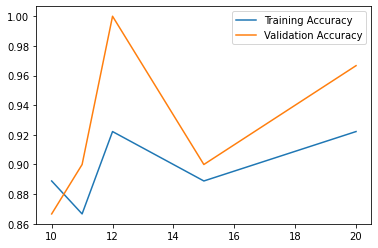

In [ ]:
#checking for overfitting
epochs=[10,11,12,15,20]
train_acc=[]
valid_acc=[]

for i in epochs:
    w=sigmoid_neuron(train,0.3,i)
    train_acc.append(predict_sigmoid(train,w))
    valid_acc.append(predict_sigmoid(valid,w))

plt.plot(epochs,train_acc, label = "Training Accuracy")
plt.plot(epochs,valid_acc, label = "Validation Accuracy")
plt.legend()
plt.show()  

In [ ]:
#k-fold crossvalidation
k=[]
for i in range(5):
   fold = df.sample(frac=0.2)
   df = df.drop(fold.index)
   k.append(fold) 

In [ ]:
test=[]
train=[]
for i in range(len(k)):
    frames=[]
    for j in range(len(k)):
       if(i!=j):
         frames.append(k[j])
       else:
          test=k[j] 
    train=pd.concat(frames) 
    w=sigmoid_neuron(train,0.3,100)
    print("Accuracy for ",(i+1)," fold: ")
    print(predict_sigmoid(test,w)*100)

prediction(test,w)    

Successfully converged
No of epochs:  100
Accuracy : 82.6086956521739
Accuracy for  1  fold: 
80.0
Successfully converged
No of epochs:  100
Accuracy : 92.0
Accuracy for  2  fold: 
87.5
Successfully converged
No of epochs:  100
Accuracy : 88.88888888888889
Accuracy for  3  fold: 
83.33333333333334
Successfully converged
No of epochs:  100
Accuracy : 89.28571428571429
Accuracy for  4  fold: 
60.0
Successfully converged
No of epochs:  100
Accuracy : 89.65517241379311
Accuracy for  5  fold: 
50.0
Class-wise Accuracy:  [1. 0. 1.]
Class-wise Precision:  [1.         1.         0.33333333]
Class-wise Recall:  [1. 0. 1.]


In [ ]:
def prediction(dataset,w):
  X = dataset.iloc[:, :-3]
  Y = dataset.iloc[:, -3:]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  Y_predict=np.zeros(len(Y_arr))
  Y=np.zeros(len(Y_arr))
  
  d=[]
  for i in range(len(Y_arr)):
     d1= 1/(1+np.exp(-(np.dot(w,np.transpose(X_arr[i])))))
     d.append(d1)
 
  for i in range(len(d)):
     max_index= np.argmax(d[i], axis=0)
     Y_predict[i]=max_index

  for i in range(len(Y_arr)):
    max_index= np.argmax(Y_arr[i], axis=0)
    Y[i]=max_index    

  cm = confusion_matrix(Y, Y_predict) 
  p=precision_score(Y, Y_predict, average=None, zero_division=1)
  r=recall_score(Y, Y_predict, average=None, zero_division=1)
  
  #Now the normalize the diagonal entries

  cm = cm.astype('float') / cm.sum(axis=1) 
  print("Class-wise Accuracy: ",cm.diagonal())
  print("Class-wise Precision: ",p)
  print("Class-wise Recall: ",r)
 